In [47]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

In [2]:
df = pd.read_csv('/content/sample_data/amazon_reviews.csv', na_values='?')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     4915 non-null   int64 
 1   reviewText  4914 non-null   object
dtypes: int64(1), object(1)
memory usage: 76.9+ KB


### Missing Values

In [4]:
df.isna().sum()

overall       0
reviewText    1
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.head(5)

,overall,reviewText
0,4,No issues.
1,5,"Purchased this for my device, it worked as adv..."
2,4,it works as expected. I should have sprung for...
3,5,This think has worked out great.Had a diff. br...
4,5,"Bought it with Retail Packaging, arrived legit..."


Dropped the records having overall ratings as 3.

In [7]:
df = df[df['overall'] != 3]

In [8]:
df.shape

(4772, 2)

# 1) Data preprocessing

#### i) converting all texts to lowercase to ensure uniformity.


In [9]:
df['reviewText'] = df['reviewText'].str.lower()

In [10]:
df.head(5)

,overall,reviewText
0,4,no issues.
1,5,"purchased this for my device, it worked as adv..."
2,4,it works as expected. i should have sprung for...
3,5,this think has worked out great.had a diff. br...
4,5,"bought it with retail packaging, arrived legit..."


In [11]:
df['reviewText'][1]

'purchased this for my device, it worked as advertised. you can never have too much phone memory, since i download a lot of stuff this was a no brainer for me.'

#### ii) Removing punctuations, numbers, stopwords from dataset.

In [12]:
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join(word for word in text if not word.isdigit())
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.lower() not in STOPWORDS]  # Use the STOPWORDS set you defined
    clean_text = ' '.join(words)
    return clean_text
df['reviewText'] = df['reviewText'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df['reviewText'].head(5)

0                                               issues
1    purchased device worked advertised never much ...
2    works expected sprung higher capacity think ma...
3    think worked greathad diff bran gb card went s...
4    bought retail packaging arrived legit orange e...
Name: reviewText, dtype: object

#### Tokenization of the words for Text

In [14]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens
df['reviewText'] = df['reviewText'].apply(tokenize_text)

In [15]:
df['reviewText']

0                                                [issues]
1       [purchased, device, worked, advertised, never,...
2       [works, expected, sprung, higher, capacity, th...
3       [think, worked, greathad, diff, bran, gb, card...
4       [bought, retail, packaging, arrived, legit, or...
                              ...                        
4910    [bought, sandisk, gb, class, use, htc, inspire...
4911    [used, extending, capabilities, samsung, galax...
4912    [great, card, fast, reliable, comes, optional,...
4913    [good, amount, space, stuff, want, fits, gopro...
4914    [ive, heard, bad, things, gb, micro, sd, card,...
Name: reviewText, Length: 4772, dtype: object

### The dataset is divided into binary classification problem where rating less than 4 is **negative [0]** and more than 3 is **positive [1]**.

In [16]:
df['targetVariable'] = [0 if i < 4 else 1 for i in df['overall']]
df = df.drop(columns=['overall'])

In [17]:
df.head()

,reviewText,targetVariable
0,[issues],1
1,"[purchased, device, worked, advertised, never,...",1
2,"[works, expected, sprung, higher, capacity, th...",1
3,"[think, worked, greathad, diff, bran, gb, card...",1
4,"[bought, retail, packaging, arrived, legit, or...",1


### 2). Data split into 80%, 10% and 10% that is training, validation and test

In [18]:
features = df.drop(columns=['targetVariable'])
features = features.reset_index(drop=True)
target = df['targetVariable']

In [19]:
x_train, temp_data, y_train, temp_target = train_test_split(features, target, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(temp_data, temp_target, test_size=0.5, random_state=42)

The Train data and validation dataset combination is used for creating distinct word dictionary and developing all other functionalities.

In [20]:
train = pd.DataFrame(np.concatenate((x_train, x_val), axis=0), columns=['reviews'])
print(train)

                                                reviews
0                                   [say, memory, card]
1     [installed, samsung, tablet, tab, definitely, ...
2     [using, fiio, x, current, gb, sd, card, full, ...
3     [micro, cards, highest, quality, cant, beat, p...
4     [bought, store, music, phone, works, flawlessl...
...                                                 ...
4289  [works, perfectly, verizon, wireless, samsung,...
4290  [love, micro, sd, card, im, glad, bought, use,...
4291  [worked, great, galaxy, died, months, later, w...
4292  [im, using, nook, hd, customized, android, os,...
4293  [since, almost, three, thousands, reviews, alr...

[4294 rows x 1 columns]


### 3). Statistics Analysis

##### Number of data samples in training/development/testing

In [21]:
print(f'The training data set: {x_train.shape},{y_train.shape}')
print(f'The validation data set: {x_val.shape},{y_val.shape}')
print(f'The test data set: {x_test.shape},{y_test.shape}')

The training data set: (3817, 1),(3817,)
The validation data set: (477, 1),(477,)
The test data set: (478, 1),(478,)


###### Number of tokens across all reviews

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

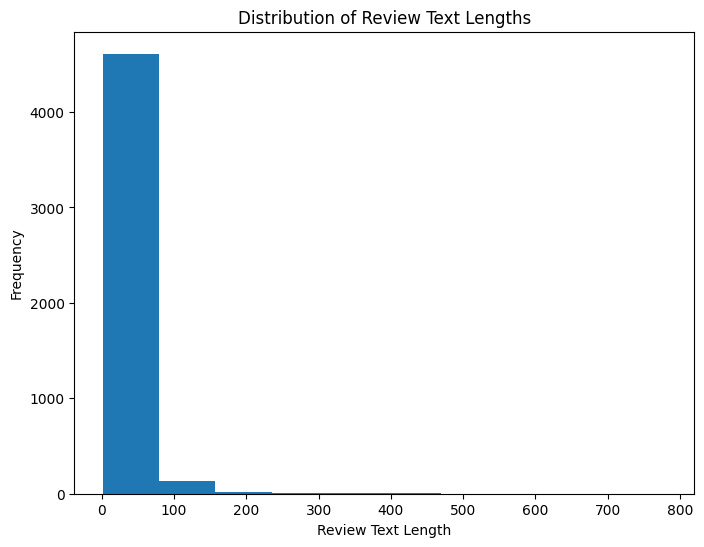

In [22]:
import matplotlib.pyplot as plt
l1 = []
for row in df['reviewText']:
  length = len(row)
  l1.append(length)
l1 = sorted(l1)
print(l1)
maximum = max(l1)
minimum = min(l1)
average = sum(l1)/len(l1)
print(f'The maximum value is:{maximum}')
print(f'The maximum value is:{minimum}')
print(f'The maximum value is: {round(average,0)} \n')

plt.figure(figsize=(8, 6))
plt.hist(l1)
plt.xlabel('Review Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Text Lengths')
plt.show()

###### Number of positive/negative reviews in training/development/testing

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4772 entries, 0 to 4914
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewText      4772 non-null   object
 1   targetVariable  4772 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 240.9+ KB


Total positve overall class: 4448
Total negative overall class: 324
Positive and negative class distribution: 0.93 and 0.07


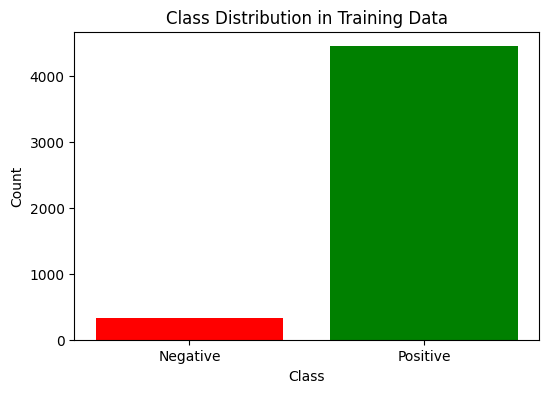

In [24]:
# overall dataset analysis
negative = df['targetVariable'].value_counts()[0]
positive = df['targetVariable'].value_counts()[1]
print(f'Total positve overall class: {positive}')
print(f'Total negative overall class: {negative}')
total_samples = df['targetVariable'].shape[0]
pos_per = round(positive / total_samples, 2)
neg_per = round(negative / total_samples, 2)
print(f'Positive and negative class distribution: {pos_per} and {neg_per}')

plt.figure(figsize=(6, 4))
plt.bar(['Negative', 'Positive'], [negative, positive], color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Training Data')
plt.show()

The Dataset is highly imbalanced. As, Positive rating are about 93% and negative ratings are around 7% of overall ratings.

In [25]:
# training dataset overview
train_neg = y_train.value_counts()[0]
train_pos = y_train.value_counts()[1]
print(f'Total positve class for training dataset: {train_pos}')
print(f'Total negative class for training dataset : {train_neg}')
total_samples_train = y_train.shape[0]
pos_train_per = round(train_pos/total_samples_train, 2)
neg_train_per = round(train_neg/total_samples_train, 2)
print(f'Positive and negative class distribution: {pos_train_per} and {neg_train_per}\n')

# val dataset overview
val_neg = y_val.value_counts()[0]
val_pos = y_val.value_counts()[1]
print(f'Total positve class for validation dataset: {val_pos}')
print(f'Total negative class for validation dataset : {val_neg}')
total_samples_val = y_val.shape[0]
pos_val_per = round(val_pos/total_samples_val, 2)
neg_val_per = round(val_neg/total_samples_val, 2)
print(f'Positive and negative class distribution: {pos_val_per} and {neg_val_per}\n')

# test dataset overview
test_neg = y_test.value_counts()[0]
test_pos = y_test.value_counts()[1]
print(f'Total positve class for validation dataset: {test_pos}')
print(f'Total negative class for validation dataset : {test_neg}')
total_samples_test = y_test.shape[0]
pos_test_per = round(test_pos/total_samples_test , 2)
neg_test_per = round(test_neg/total_samples_test , 2)
print(f'Positive and negative class distribution: {pos_test_per} and {neg_test_per}')

Total positve class for training dataset: 3559
Total negative class for training dataset : 258
Positive and negative class distribution: 0.93 and 0.07

Total positve class for validation dataset: 444
Total negative class for validation dataset : 33
Positive and negative class distribution: 0.93 and 0.07

Total positve class for validation dataset: 445
Total negative class for validation dataset : 33
Positive and negative class distribution: 0.93 and 0.07


# 2). Representation of Texts: word vectors



## **i) Count-based word vectors with co-occurrence matrix**

### The distinct words list used in the review corpus

In [26]:
def get_vocab(corpus):
  word_list = [word for words in corpus for word in words]
  words = list(set(word_list))  #creating list of the distinct words
  distinct_corpus = sorted(words) #sorting the words list
  return distinct_corpus #returning the distinct word list
word_dict = get_vocab(train['reviews'])

### Built Co-occurence matrix.

In [27]:
def compute_co_occurrence_matrix(corpus, window_size=4):
    words = get_vocab(corpus)
    n_words = len(words)
    M = np.zeros(shape=(n_words, n_words), dtype=np.int32)
    word2ind = {word: ind for ind, word in enumerate(words)}

    for tokens in corpus:
        # Iterate through each center word in the sentence
        for ind, center in enumerate(tokens):
            #Extract the surrounding words (context words) for the current/center word
            start = max(0, ind - window_size)
            end = min(ind + window_size + 1, len(tokens))

            # Check if the center word is in the vocabulary
            center_index = word2ind.get(center, -1)

            if center_index != -1:
                for token_ind in range(start, end):
                    if token_ind != ind:
                        context_word = tokens[token_ind]
                        # Check if the context word is in the vocabulary
                        context_index = word2ind.get(context_word, -1)
                        if context_index != -1:
                            M[center_index][context_index] += 1
    return M, word2ind

In [28]:
M, word2ind = compute_co_occurrence_matrix(train['reviews'], window_size=4)
print(f'The co-occurrence matrix of word counts shape:{M.shape} \n')
print(f'The dictionary that maps word to index: \n{word2ind}')

The co-occurrence matrix of word counts shape:(8937, 8937) 

The dictionary that maps word to index: 
{'aac': 0, 'aas': 1, 'aba': 2, 'abdroid': 3, 'abilities': 4, 'ability': 5, 'able': 6, 'aboutgood': 7, 'abouti': 8, 'abouttherehere': 9, 'aboutto': 10, 'abroad': 11, 'absolute': 12, 'absolutely': 13, 'abuse': 14, 'abused': 15, 'abysmal': 16, 'accdientally': 17, 'accept': 18, 'acceptable': 19, 'acceptably': 20, 'accepted': 21, 'accepting': 22, 'accepts': 23, 'access': 24, 'accessed': 25, 'accesses': 26, 'accessible': 27, 'accessing': 28, 'accessories': 29, 'accessory': 30, 'accessoryalternative': 31, 'accident': 32, 'accidentally': 33, 'accidently': 34, 'acclimated': 35, 'accolades': 36, 'accommodate': 37, 'accomplish': 38, 'accord': 39, 'according': 40, 'accordingly': 41, 'account': 42, 'accurate': 43, 'accuratei': 44, 'ace': 45, 'acer': 46, 'acess': 47, 'acheive': 48, 'achieve': 49, 'achieved': 50, 'achievedusing': 51, 'achieves': 52, 'acitve': 53, 'acknowledge': 54, 'acknowledged': 55

**Explanation**: To build a matrix of word co-occurrences, I first iterate over the corpus to extract all of the words. Then, for each word in the corpus, I assign the four context words on either side of it to the matrix. It is important to check if the center word and each context word are present in the word-to-index dictionary before assigning them to the matrix. Finally, I iterate over the matrix positions and increment their values by the number of times each pair of words occurs together.

### iii) Dimensionality reduction on the matrix M to produce k-dimensional embeddings

In [29]:
def reduce_to_k_dim(M, k):
  n_iters = 10
  M_reduced = None
  print("Running Truncated SVD over %i words..." % (M.shape[0]))
  svd = TruncatedSVD(n_components=k, n_iter=n_iters)
  M_reduced = svd.fit_transform(M)
  print("Done.")
  return M_reduced

In [30]:
M_reduced = reduce_to_k_dim(M, k=400)
print(f'The new matrix shape is: \n{M_reduced.shape}')

Running Truncated SVD over 8937 words...
Done.
The new matrix shape is: 
(8937, 400)


**Explanation** : I used Truncated Singular Value Decomposition (SVD) to reduce the number of features in the word embedding matrix. SVD is a technique that can be used to decompose a matrix into a set of orthogonal vectors, where the first few vectors capture most of the variance in the data. I used a random number of k values to get different clusterings and visualizations of the word similarities.

### iv) Plotting the embeddings of few words.

In [31]:
def plot_embeddings(M_reduced, word2ind, words_to_plot):
    for word in words_to_plot:
        idx = word2ind[word]
        x = M_reduced[idx][0]
        y = M_reduced[idx][1]
        plt.scatter(x, y, marker='o',color='blue')
        plt.text(x, y, word)
    plt.show()

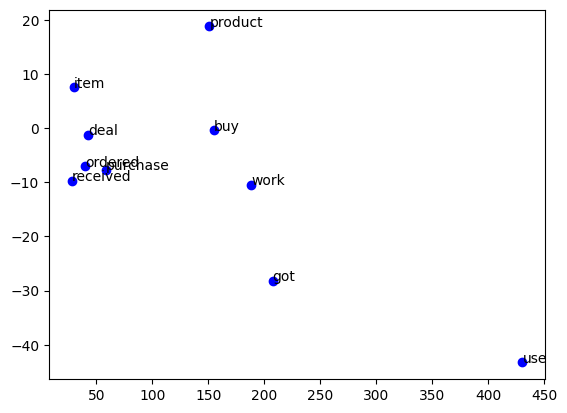

In [32]:
words_to_plot=['purchase', 'buy', 'work', 'got', 'ordered', 'received', 'product', 'item', 'deal', 'use']
plot_embeddings(M_reduced, word2ind, words_to_plot)

**Explanation**: The plot is easy to understand because words like "item", "deal", "ordered", "purchase", "received", and "buy" are commonly used in reviews and are similar to each other. However, words like "work", "got", and "use" are less common and not as frequently paired/used by reviewers. Finally, I believe that the word "product" could have been in the cluster of embedding plots, but it is not highly correlated due to the truncated version that was applied.

## **ii) Prediction-based word vectors from Glove**

In [33]:
def load_embedding_model():
  """ Load GloVe Vectors
  Return:
  wv_from_bin: All 400000 embeddings, each lengh 200
  """
  import gensim.downloader as api
  wv_from_bin = api.load("glove-wiki-gigaword-200")
  print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))
  return wv_from_bin
wv_from_bin = load_embedding_model()

Loaded vocab size 400000


In [34]:
def get_matrix_of_vectors(wv_from_bin, required_words):
  """ Put the GloVe vectors into a matrix M.
  Param:
  wv_from_bin: KeyedVectors object; the 400000 GloVe vectors loaded from file
  Return:
  M: numpy matrix shape (num words, 200) containing the vectors word2ind: dictionary mapping each word to its row number in M
  """
  import random
  words = list(wv_from_bin.index_to_key)
  print("Shuffling words ...")
  random.seed(225)
  random.shuffle(words)
  words = words[:10000]
  print("Putting %i words into word2ind and matrix M..." % len(words))
  word2ind = {}
  M = []
  curInd = 0
  for w in words:
    try:
      M.append(wv_from_bin.get_vector(w))
      word2ind[w] = curInd
      curInd += 1
    except KeyError:
      continue
  for w in required_words:
    if w in words:
      continue
    try:
      M.append(wv_from_bin.get_vector(w))
      word2ind[w] = curInd
      curInd += 1
    except KeyError: continue
  M = np.stack(M)
  print("Done.")
  return M, word2ind

In [35]:
M_glove, word2Ind_glove = get_matrix_of_vectors(wv_from_bin, word_dict)
M_reduced_glove = reduce_to_k_dim(M_glove, k=2)
print(f'M reduced GLOVE shape: \n{M_reduced_glove.shape} \n')

Shuffling words ...
Putting 10000 words into word2ind and matrix M...
Done.
Running Truncated SVD over 15959 words...
Done.
M reduced GLOVE shape: 
(15959, 2) 



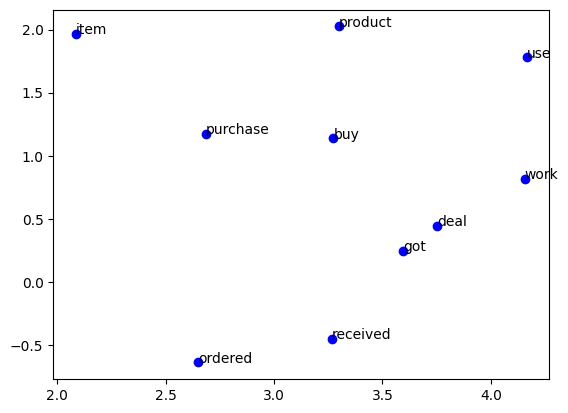

In [36]:
plot_embeddings(M_reduced_glove, word2Ind_glove, words_to_plot)

**Explanation**: Truncated SVD with k=2 does not capture enough information for Glove M=(16232, 2), but k=400 captures highly correlated information for M=(9466, 9466). This is because the explained variance ratio is higher for k=400.

# 3) Sentiment Classification Algorithms

### Review embeddings

In [37]:
M_reduced_ = reduce_to_k_dim(M, k=128)
print(f'M reduced shape: {M_reduced_.shape} \n')

Running Truncated SVD over 8937 words...
Done.
M reduced shape: (8937, 128) 



In [38]:
def review_embeddings(review, M, word2ind):
  review_embeddings = []
  for lst in review:
    word_embedding = []
    for token in lst:
      if token in word2ind:
        word_embedding.append(np.array(M[word2ind[token]]))
    if len(lst) > 0:
      review_embed = np.mean(word_embedding, axis=0)
      review_embeddings.append(review_embed)
  return np.array(review_embeddings)

train_review_embedded = review_embeddings(x_train['reviewText'], M_reduced_, word2ind)
val_review_embedded = review_embeddings(x_val['reviewText'], M_reduced_, word2ind)
test_review_embedded = review_embeddings(x_test['reviewText'], M_reduced_, word2ind)

print(f'The shape of review embedding for the train set is: {train_review_embedded.shape}')
print(f'The shape of review embedding for the val set is: {val_review_embedded.shape}')
print(f'The shape of review embedding for the test set is: {test_review_embedded.shape}')

The shape of review embedding for the train set is: (3817, 128)
The shape of review embedding for the val set is: (477, 128)
The shape of review embedding for the test set is: (478, 128)


**Explanation**
- To get the review embeddings, I first iterated over each token in each review and built a word embedding array for each word, with a shape of (128, ). I did this because the reduced word embedding matrix, M_reduced_, has a shape of (8937, 128).

- Next, to build the review embeddings, I averaged the word embedding arrays for each review. Finally, I appended all of the review embeddings to form a single review embedding matrix.

- For example, if a review has 3 tokens, then the word embedding for each token will have a shape of (128, ), and the word embeddings will have a shape of (3, 128). To get the review embedding, I would apply the np.mean() function to the word embeddings, which would result in a shape of (128,).

- Since there are 3817 reviews for train set, the shape of the review embedding matrix will be (3817, 128).

### Model Implementation

#### i) Logistic Regression (L2 Regularization)

The training review embedding data has values that are not scaled to the same range. This could cause the classification model to be biased towards certain values. To address this, I used a standard scaler to scale the data so that all of the values are on the same scale. This will help the classification model to make more accurate predictions.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

#standard scaling
scaler = StandardScaler()
train_review_embedded_scaled = scaler.fit_transform(train_review_embedded)

clf = LogisticRegression(penalty='l2', max_iter=500)
clf.fit(train_review_embedded_scaled, y_train)

#scaled val and test data
val_review_embedded_scaled = scaler.transform(val_review_embedded)
test_review_embedded_scaled = scaler.transform(test_review_embedded)
val_pred_lr = clf.predict(val_review_embedded_scaled)
test_pred_lr = clf.predict(test_review_embedded_scaled)
test_pred_probs_lr = clf.predict_proba(test_review_embedded_scaled)

#### ii) Neural Network with tensorflow

In [40]:
import tensorflow as tf
model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(train_review_embedded.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

model_tf.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model_tf.fit(train_review_embedded, y_train, epochs=10)

Epoch 1/10
120/120 [==============================] - 2s 3ms/step - loss: 0.5541 - accuracy: 0.7453
Epoch 2/10
120/120 [==============================] - 0s 3ms/step - loss: 0.2898 - accuracy: 0.9337
Epoch 3/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9447
Epoch 4/10
120/120 [==============================] - 0s 3ms/step - loss: 0.1501 - accuracy: 0.9500
Epoch 5/10
120/120 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 0.9526
Epoch 6/10
120/120 [==============================] - 0s 3ms/step - loss: 0.1233 - accuracy: 0.9560
Epoch 7/10
120/120 [==============================] - 0s 3ms/step - loss: 0.1166 - accuracy: 0.9534
Epoch 8/10
120/120 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9594
Epoch 9/10
120/120 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.9591
Epoch 10/10
120/120 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9602

In [41]:
# val dataset
val_pred_probs = model_tf.predict(val_review_embedded)
val_pred_NN = (val_pred_probs > 0.5).astype(int)



# test dataset
test_pred_probs = model_tf.predict(test_review_embedded)
test_pred_NN = (test_pred_probs > 0.5).astype(int)

15/15 [==============================] - 0s 2ms/step


### Model Evaluation

To evaluate the performance of the sentiment classification model:
- Accuracy
- F1 Score
- AUC (Area Under Curve)
- ROC AUC Score

Visualizations to help understand the model's performance:
- Classification report
- confusion matrix
- AUC curve

#### i) Logistic Regression Evaluations

In [42]:
# validation dataset
val_accuracy_lr = accuracy_score(y_val, val_pred_lr)
val_f1_lr = f1_score(y_val, val_pred_lr)
val_class_report_lr = classification_report(y_val, val_pred_lr)

# Print the confusion matrix
print("Validation Metrics:")
print(f'The validation set accuracy for Logistic Regression: {val_accuracy_lr:.2f}')
print(f'The validation set F1 Score for Logistic Regression: {val_f1_lr:.2f} \n')
print(f'Classification Report for  Logistic Regression val dataset:\n {val_class_report_lr}')


#test dataset
test_accuracy_lr = accuracy_score(y_test, test_pred_lr)
test_f1_lr = f1_score(y_test, test_pred_lr)
test_class_report_lr = classification_report(y_test, test_pred_lr)

print("\nTest Metrics:")
print(f'The test dataset accuracy for Logistic Regression: {test_accuracy_lr:.2f}')
print(f'The test dataset F1 Score for Logistic Regression: {test_f1_lr:.2f} \n')
print(f'Classification Report for Logistic Regression test dataset: \n {test_class_report_lr}')

Validation Metrics:
The validation set accuracy for Logistic Regression: 0.96
The validation set F1 Score for Logistic Regression: 0.98 

Classification Report for  Logistic Regression val dataset:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67        33
           1       0.97      0.98      0.98       444

    accuracy                           0.96       477
   macro avg       0.86      0.80      0.82       477
weighted avg       0.96      0.96      0.96       477


Test Metrics:
The test dataset accuracy for Logistic Regression: 0.95
The test dataset F1 Score for Logistic Regression: 0.97 

Classification Report for Logistic Regression test dataset: 
               precision    recall  f1-score   support

           0       0.66      0.58      0.61        33
           1       0.97      0.98      0.97       445

    accuracy                           0.95       478
   macro avg       0.81      0.78      0.79       478
weighted av

#### ii) Neural Network Model

In [43]:
val_accuracy_NN = accuracy_score(y_val, val_pred_NN)
val_f1_NN = f1_score(y_val, val_pred_NN)
val_class_report_NN = classification_report(y_val, val_pred_NN, target_names=['Class 0', 'Class 1'])

print("Validation Metrics:")
print(f"The validation set accuracy for Neural Network : {val_accuracy_NN:.2f}")
print(f"The validation set F1 Score for Neural Network: {val_f1_NN:.2f}")
print(f"Classification Report for  Neural Network val dataset: \n {val_class_report_NN}")


test_accuracy_NN = accuracy_score(y_test, test_pred_NN)
test_f1_NN = f1_score(y_test, test_pred_NN)
test_class_report_NN = classification_report(y_test, test_pred_NN, target_names=['Class 0', 'Class 1'])


print("\nTest Metrics:")
print(f"The test dataset accuracy for Neural Network: {test_accuracy_NN:.2f}")
print(f"The test dataset F1 Score for Neural Network: {test_f1_NN:.2f}")
print(f"Classification Report for Logistic Regression test dataset: \n {test_class_report_NN}")



Validation Metrics:
The validation set accuracy for Neural Network : 0.95
The validation set F1 Score for Neural Network: 0.98
Classification Report for  Neural Network val dataset: 
               precision    recall  f1-score   support

     Class 0       0.74      0.52      0.61        33
     Class 1       0.96      0.99      0.98       444

    accuracy                           0.95       477
   macro avg       0.85      0.75      0.79       477
weighted avg       0.95      0.95      0.95       477


Test Metrics:
The test dataset accuracy for Neural Network: 0.96
The test dataset F1 Score for Neural Network: 0.98
Classification Report for Logistic Regression test dataset: 
               precision    recall  f1-score   support

     Class 0       0.75      0.64      0.69        33
     Class 1       0.97      0.98      0.98       445

    accuracy                           0.96       478
   macro avg       0.86      0.81      0.83       478
weighted avg       0.96      0.96     

Matrix Evaluation Visuals

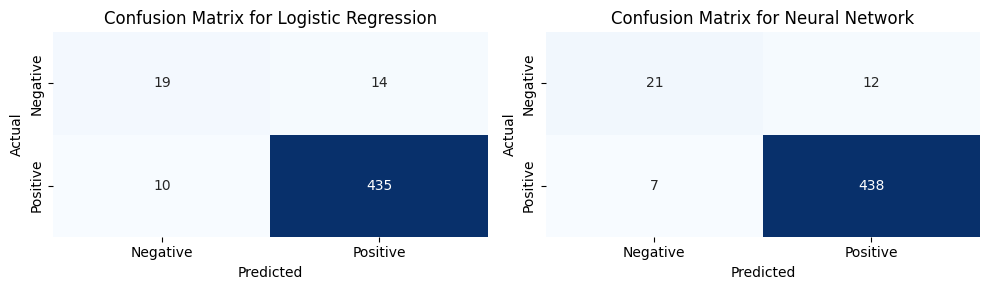

In [44]:
import seaborn as sns
class_labels = ['Negative', 'Positive']

fig, axes = plt.subplots(1, 2, figsize=(10, 3))  # Create a 1x2 grid of subplots

# Confusion matrix for Logistic Regression
confusion_mat_test_lr = confusion_matrix(y_test, test_pred_lr)
sns.heatmap(confusion_mat_test_lr, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix for Logistic Regression')

# Confusion matrix for Neural Network
test_confusion_mat_NN = confusion_matrix(y_test, test_pred_NN)
sns.heatmap(test_confusion_mat_NN, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix for Neural Network')

plt.tight_layout()
plt.show()


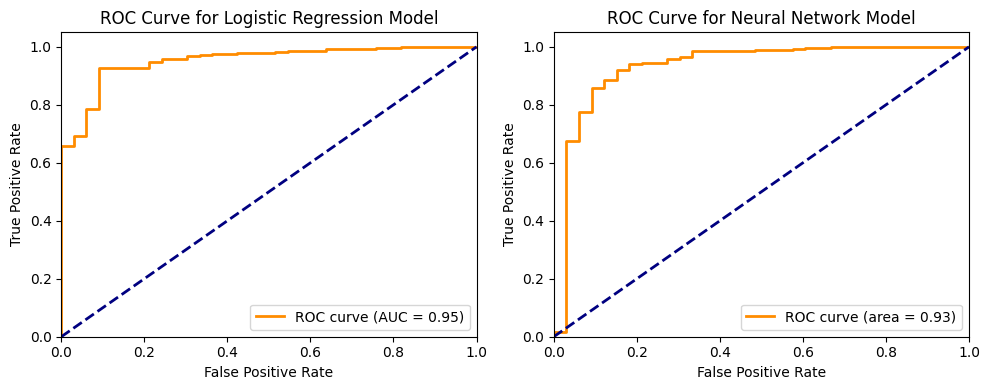

In [45]:
# ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

test_auc_lr = roc_auc_score(y_test, test_pred_lr)
fpr_test, tpr_test, thresholds = roc_curve(y_test, test_pred_probs_lr[:,1])
roc_auc_lr = auc(fpr_test, tpr_test)

axes[0].plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve for Logistic Regression Model')
axes[0].legend(loc='lower right')

test_auc_NN = roc_auc_score(y_test, test_pred_NN)
fpr_, tpr_, thresholds_ = roc_curve(y_test, test_pred_probs)
roc_auc_NN = auc(fpr_, tpr_)

axes[1].plot(fpr_, tpr_, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_NN:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve for Neural Network Model')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


In [46]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Neural Network'],
    'Accuracy': [round(test_accuracy_lr,2), round(test_accuracy_NN,2)],
    'F1 Score': [round(test_f1_lr,2), round(test_f1_NN,2)],
    'AUC': [round(roc_auc_lr,2), round(roc_auc_NN,2)]
})
print(results)

                 Model  Accuracy  F1 Score   AUC
0  Logistic Regression      0.95      0.97  0.95
1       Neural Network      0.96      0.98  0.93


**Final Results and Model Selection**:

AUC is a better overall measure of model performance than F1 score, as it takes into account both precision and recall.

Therefore, the logistic regression model is the better model. It is more accurate, has a higher F1 score, and has a higher AUC than the neural network model.

I also believe that Logistic regression is simpler and less prone to overfitting on small datasets than neural networks.

The ***logistic regression model outperforms*** the neural network model on all metrics, and is simpler, making it less prone to overfitting on small datasets

**P.S: Since the results of the notebook may vary each time it is run, my explanation for selecting the better model will be helpful. This is because the model selection process is affected by the random state that is selected when splitting the datasets.**